# Build your first machine learning model

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Import data
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

* Below, you will drop the target 'Survived' from the training dataset and create a new DataFrame `data` that consists of training and test sets combined;
* But first, you'll store the target variable of the training data for safe keeping.

In [2]:
# Store target variable of training data in a safe place
survived_train = df_train.Survived

# Concatenate training and test sets
data = pd.concat([df_train.drop(['Survived'], axis=1), df_test ])

* Check out your new DataFrame `data` using the `info()` method.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


^ There are 2 numerical variables that have missing values: what are they?
* Impute these missing values, using the median of the of these variables where we know them:

In [4]:
# Impute missing numerical variables
data['Age'] = data.Age.fillna(data.Age.median())
data['Fare'] = data.Fare.fillna(data.Fare.median())

# Check out info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


* As you want to encode your data with numbers, you'll want to change 'male' and 'female' to numbers. Use the `pandas` function `get_dummies` to do so:

In [5]:
data = pd.get_dummies(data, columns=['Sex'], drop_first=True)
data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


* Select the columns `['Sex_male', 'Fare', 'Age','Pclass', 'SibSp']` from your DataFrame to build your first machine learning model:

In [6]:
# Select columns and view head
data = data[['Sex_male', 'Fare', 'Age','Pclass', 'SibSp']]
data.head()

,Sex_male,Fare,Age,Pclass,SibSp
0,1,7.2500,22.0,3,1
1,0,71.2833,38.0,1,1
2,0,7.9250,26.0,3,0
3,0,53.1000,35.0,1,1
4,1,8.0500,35.0,3,0


* Use `.info()` to check out `data`:

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 5 columns):
Sex_male    1309 non-null uint8
Fare        1309 non-null float64
Age         1309 non-null float64
Pclass      1309 non-null int64
SibSp       1309 non-null int64
dtypes: float64(2), int64(2), uint8(1)
memory usage: 52.4 KB


**Recap:**
* You've got your data in a form to build first machine learning model.

**Up next:** it's time to build your first machine learning model!

For more on `pandas`, check out our [Data Manipulation with Python track](https://www.datacamp.com/tracks/data-manipulation-with-python). 

If you're enoying this session, retweet or share on FB now and follow us on Twitter: [@hugobowne](https://twitter.com/hugobowne) & [@DataCamp](https://twitter.com/datacamp).

## In which you build a decision tree classifier

What is a Decision tree classsifier? It is a tree that allows you to classify data points (aka predict target variables) based on feature variables. For example,

<img src="img/decision_tree_titanic_1.png" width="400">

* You first **fit** such a model to your training data, which means deciding (based on the training data) which decisions will split at each branching point in the tree: e.g., that the first branch is on 'Male' or not and that 'Male' results in a prediction of 'Dead'. 

* Before fitting a model to your `data`, split it back into training and test sets:

In [8]:
data_train = data.iloc[:891]
data_test = data.iloc[891:]

* You'll use `scikit-learn`, which requires your data as arrays, not DataFrames so transform them:

In [10]:
x = data_train.values
test = data_test.values
y = survived_train.values

* Now you get to build your decision tree classifier! First create such a model with `max_depth=3` and then fit it your data:

In [11]:
# Instantiate model and fit to data
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

* Make predictions on your test set, create a new column 'Survived' and store your predictions in it. Save 'PassengerId' and 'Survived' columns of `df_test` to a .csv and submit to Kaggle.

In [12]:
# Make predictions and store in 'Survived' column of df_test
Y_pred = clf.predict(test)
df_test['Survived'] = Y_pred

In [13]:
df_test[['PassengerId', 'Survived']].to_csv('data/predictions/1st_dec_tree.csv', index=False)

* What is the accuracy of your model, as reported by Kaggle?

Accuracy = 77.99

**Recap:**
* You've got your data in a form to build first machine learning model.
* You've built your first machine learning model: a decision tree classifier.

**Up next:** figure out what this `max_depth` argument was, why we chose it and explore `train_test_split`.

For more on `scikit-learn`, check out our [Supervised Learning with scikit-learn course](https://www.datacamp.com/courses/supervised-learning-with-scikit-learn). 

If you're enoying this session, retweet or share on FB now and follow us on Twitter: [@hugobowne](https://twitter.com/hugobowne) & [@DataCamp](https://twitter.com/datacamp).

## What was this decision tree classifier?

<img src="img/decision_tree_titanic_3.png" width="900">

Note: you can use `graphviz` to generate figures such as this. See the `scikit-learn` documentation [here](http://scikit-learn.org/stable/modules/tree.html) for further details. In building this model, what you're essentially doing is creating a _decision boundary_ in the space of feature variables, for example (image from [here](http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html)):

<img src="img/dec_bound.png" width="400">

## Why would you choose max_depth=3 ?

The depth of the tree is known as a hyperparameter, which means a parameter we need to decide before we fit the model to the data. If we choose a larger `max_depth`, we'll get a more complex decision boundary. 

* If our decision boundary is _too complex_ we can overfit to the data, which means that our model will be describing noise as well as signal.

* If our max_depth is too small, we may be underfitting the data, meaning that our model doesn't contain enough of the signal.

**How do we tell whether we're overfitting or underfitting?** Note: this is also referred to as the bias-variance trade-off and we won;t go into details on that here.

One way is to hold out a test set from our training data. We can then fit the model to our training data, make predictions on our test set and see how well our prediction does on the test set. 

* You'll now do this: split your original training data into training and test sets:

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42, stratify=y)

* Iterate over values of `max_depth` ranging from 1 to 9 and plot the accuracy of the models on training and test sets:

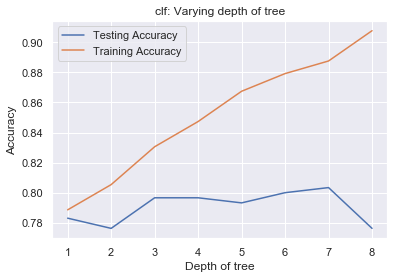

In [15]:
# Setup arrays to store train and test accuracies
dep = np.arange(1, 9)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a k-NN Classifier with k neighbors: knn
    clf = tree.DecisionTreeClassifier(max_depth=k)

    # Fit the classifier to the training data
    clf.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(x_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(x_test, y_test)

# Generate plot
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()

**Recap:**
* You've got your data in a form to build first machine learning model.
* You've built your first machine learning model: a decision tree classifier.
* You've learnt about `train_test_split` and how it helps us to choose ML model hyperparameters.

**Up next:** Engineer some new features and build some new models! Open the notebook `3-titanic_feature_engineering_ML.ipynb`.

For more on `scikit-learn`, check out our [Supervised Learning with scikit-learn course](https://www.datacamp.com/courses/supervised-learning-with-scikit-learn). 

If you're enoying this session, retweet or share on FB now and follow us on Twitter: [@hugobowne](https://twitter.com/hugobowne) & [@DataCamp](https://twitter.com/datacamp).